In [1]:
import json
import requests
from collections import defaultdict

# Function to fetch and process JSON data for a given state URL
def process_state_data(url):
    # Fetch JSON data from the URL
    response = requests.get(url)
    data = response.json()
    
    # Extract winter storms data
    winter_storms = data["data"]
    
    # Calculate number of winter storms and total cost
    num_winter_storms = len(winter_storms)
    total_cost = sum(float(storm["totalCost"]) for storm in winter_storms)
    
    return num_winter_storms, total_cost

# URLs for each state's JSON data
state_urls = {
    "Texas": "https://www.ncei.noaa.gov/access/billions/events-TX-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "North Carolina": "https://www.ncei.noaa.gov/access/billions/events-NC-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "New York": "https://www.ncei.noaa.gov/access/billions/events-NY-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm"
}

# Process data for each state
state_results = {}
for state, url in state_urls.items():
    num_winter_storms, total_cost = process_state_data(url)
    state_results[state] = {"num_winter_storms": num_winter_storms, "total_cost": total_cost}

# Find state with maximum winter storms and maximum total cost
max_winter_storms_state = max(state_results, key=lambda x: state_results[x]["num_winter_storms"])
max_total_cost_state = max(state_results, key=lambda x: state_results[x]["total_cost"])

# Print results
print("State with Maximum Winter Storms:")
print("State:", max_winter_storms_state)
print("Number of Winter Storms:", state_results[max_winter_storms_state]["num_winter_storms"])
print()
print("State with Maximum Total Cost:")
print("State:", max_total_cost_state)
print("Total Cost (in millions of dollars):", state_results[max_total_cost_state]["total_cost"])


State with Maximum Winter Storms:
State: North Carolina
Number of Winter Storms: 7

State with Maximum Total Cost:
State: New York
Total Cost (in millions of dollars): 48202.299999999996


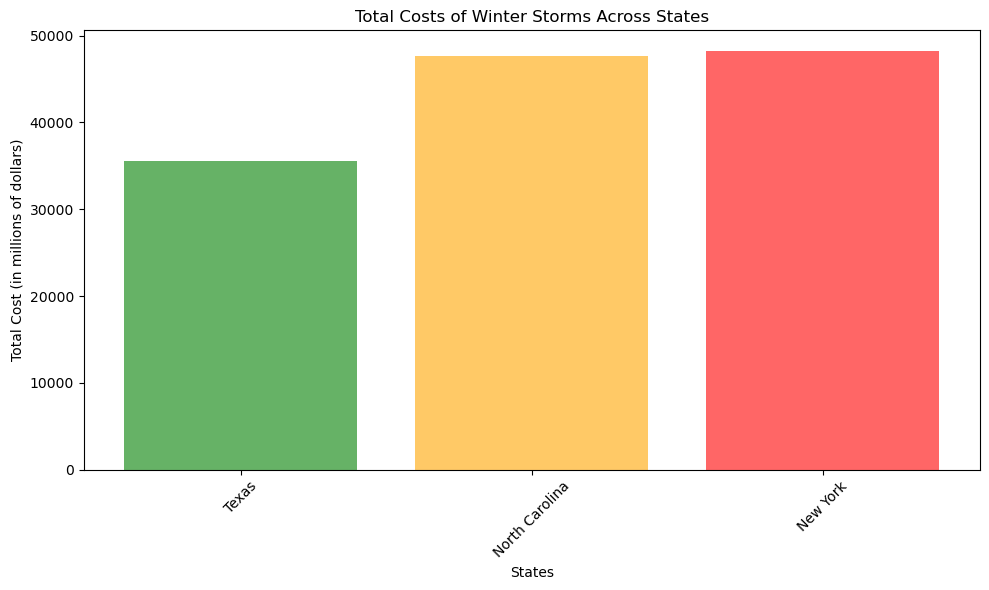

In [2]:
import json
import requests
import matplotlib.pyplot as plt

# Function to fetch and process JSON data for a given state URL
def process_state_data(url):
    # Fetch JSON data from the URL
    response = requests.get(url)
    data = response.json()
    
    # Extract winter storms data
    winter_storms = data["data"]
    
    # Calculate total cost
    total_cost = sum(float(storm["totalCost"]) for storm in winter_storms)
    
    return total_cost

# URLs for each state's JSON data
state_urls = {
    "Texas": "https://www.ncei.noaa.gov/access/billions/events-TX-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "North Carolina": "https://www.ncei.noaa.gov/access/billions/events-NC-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "New York": "https://www.ncei.noaa.gov/access/billions/events-NY-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm"
}

# Process data for each state
state_results = {}
for state, url in state_urls.items():
    total_cost = process_state_data(url)
    state_results[state] = total_cost

# Find state with maximum and minimum total cost
max_cost_state = max(state_results, key=state_results.get)
min_cost_state = min(state_results, key=state_results.get)

# Extract data for visualization
states = list(state_results.keys())
total_costs = [state_results[state] for state in states]

# Create bar chart
plt.figure(figsize=(10, 6))

# Plot bars for each state
for state, cost in state_results.items():
    color = 'red' if state == max_cost_state else 'green' if state == min_cost_state else 'orange'
    plt.bar(state, cost, color=color, alpha=0.6)

plt.xlabel('States')
plt.ylabel('Total Cost (in millions of dollars)')
plt.title('Total Costs of Winter Storms Across States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
import json
import requests

# Function to fetch and process JSON data for a given state URL
def process_state_data(url):
    # Fetch JSON data from the URL
    response = requests.get(url)
    data = response.json()
    
    # Extract winter storms data
    winter_storms = data["data"]
    
    # Find the winter storm event that lasted the longest
    longest_duration_event = max(winter_storms, key=lambda x: x["endDate"] - x["begDate"])
    
    return longest_duration_event

# URLs for each state's JSON data
state_urls = {
    "Texas": "https://www.ncei.noaa.gov/access/billions/events-TX-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "North Carolina": "https://www.ncei.noaa.gov/access/billions/events-NC-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "New York": "https://www.ncei.noaa.gov/access/billions/events-NY-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm"
}

# Process data for each state
longest_duration_events = {}
for state, url in state_urls.items():
    longest_duration_event = process_state_data(url)
    longest_duration_event["state"] = state  # Add state information
    longest_duration_events[state] = longest_duration_event

# Find which event lasted the longest across all states
longest_event_across_states = max(longest_duration_events.values(), key=lambda x: x["endDate"] - x["begDate"])

# Print the longest event across all states
print("The Winter Storm Event That Lasted the Longest Across All States:")
print("Name:", longest_event_across_states["name"])
print("State:", longest_event_across_states["state"])
print("Duration (in days):", (longest_event_across_states["endDate"] - longest_event_across_states["begDate"]))


The Winter Storm Event That Lasted the Longest Across All States:
Name: Northwest, Central, Eastern Winter Storm and Cold Wave (February 2021)
State: Texas
Duration (in days): 9


In [4]:
import json
import requests
from collections import defaultdict

# Load the JSON data from the URL
url = "https://www.ncei.noaa.gov/access/billions/events-TX-1980-2024.json?disasters[]=freeze&disasters[]=winter-storm"
response = requests.get(url)
data = response.json()

# Extract winter storms data
winter_storms = data["data"]

# Create a dictionary to store total costs by year
total_costs_by_year = defaultdict(float)

# Aggregate total costs by year
for storm in winter_storms:
    year = str(storm["begDate"])[:4]  # Extract year from begin date
    total_costs_by_year[year] += float(storm["totalCost"])  # Accumulate total cost

# Find the year with the maximum total cost
max_year = max(total_costs_by_year, key=total_costs_by_year.get)
max_cost = total_costs_by_year[max_year]

# Print the year with the maximum total cost
print("Year with Maximum Total Cost:", max_year)
print("Maximum Total Cost (in millions of dollars):", max_cost)


Year with Maximum Total Cost: 2021
Maximum Total Cost (in millions of dollars): 26769.4


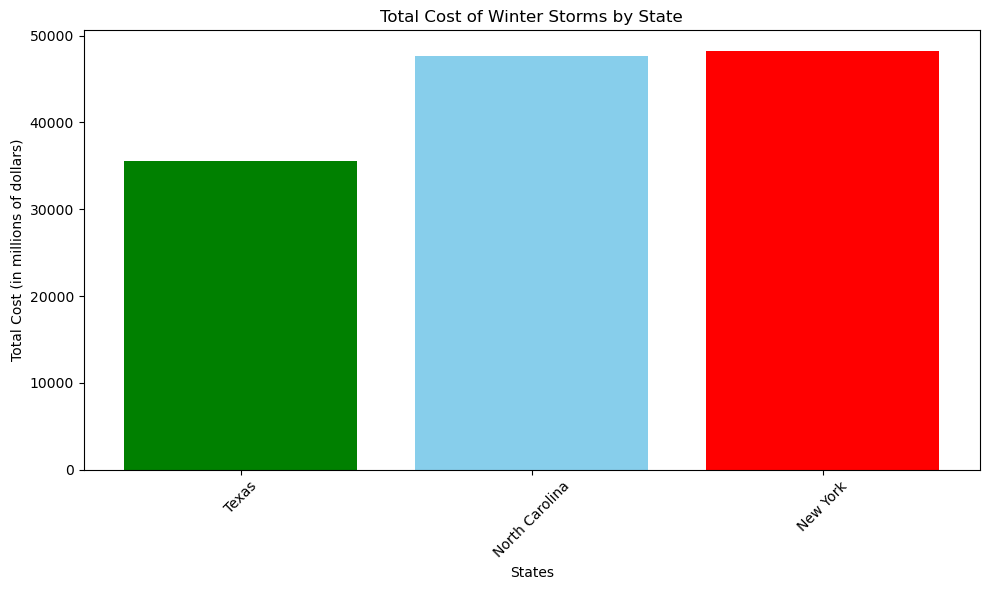

In [5]:
import json
import requests
import matplotlib.pyplot as plt

# Function to fetch and process JSON data for a given state URL
def process_state_data(url):
    # Fetch JSON data from the URL
    response = requests.get(url)
    data = response.json()
    
    # Extract winter storms data
    winter_storms = data["data"]
    
    # Calculate total cost for the state
    total_cost = sum(float(storm["totalCost"]) for storm in winter_storms)
    
    return total_cost

# URLs for each state's JSON data
state_urls = {
    "Texas": "https://www.ncei.noaa.gov/access/billions/events-TX-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "North Carolina": "https://www.ncei.noaa.gov/access/billions/events-NC-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm",
    "New York": "https://www.ncei.noaa.gov/access/billions/events-NY-2014-2024.json?disasters[]=freeze&disasters[]=winter-storm"
}

# Process data for each state
state_results = {}
for state, url in state_urls.items():
    total_cost = process_state_data(url)
    state_results[state] = total_cost

# Find state with maximum and minimum total cost
max_cost_state = max(state_results, key=state_results.get)
min_cost_state = min(state_results, key=state_results.get)

# Create bar graph
plt.figure(figsize=(10, 6))

# Plot bars for each state
for state, cost in state_results.items():
    color = 'red' if state == max_cost_state else 'green' if state == min_cost_state else 'skyblue'
    plt.bar(state, cost, color=color)

plt.ylabel('Total Cost (in millions of dollars)')
plt.xlabel('States')
plt.title('Total Cost of Winter Storms by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()